# 1. Preparation

In [329]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [216]:
data = pd.read_excel('Data Model - Pizza Sales.xlsx')
data = data.set_index('order_details_id')
data["order_date"] = pd.to_datetime(data["order_date"])
data["order_time"] = pd.to_datetime(data["order_time"], format='%H:%M:%S').dt.time
data

,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
order_details_id,,,,,,,,,,,
1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...
48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza


# 2. Informations de base

#### a. Combien de pizzas uniques (pizza_id distincts) y a-t-il dans le jeu de données ?

In [217]:
# Nombre de pizza_id distinct
nb_pizza_id = data["pizza_id"].unique().shape[0]

print(f"Il y a {nb_pizza_id} pizzas distincts (pizza_id distincts) dans le jeu de données")

Il y a 91 pizzas distincts (pizza_id distincts) dans le jeu de données


#### b. Combien de commandes uniques (order_id distincts) figurent dans le jeu de données ?

In [218]:
# Nombre de order_id distinct
nb_order_id = data["order_id"].unique().shape[0]

print(f"Il y a {nb_order_id} commandes uniques (order_id distincts) dans le jeu de données")

Il y a 21350 commandes uniques (order_id distincts) dans le jeu de données


# 3. Analyse temporelle

#### a. Quelle est la plage de dates dans le jeu de données ?

In [219]:
# Recherche de la date minimum
date_min = data["order_date"].min()

# Recherche de la date maximum
date_max = data["order_date"].max()


print(f"Les plage de date dans le jeu de données vont de {date_min} au {date_max}")


Les plage de date dans le jeu de données vont de 2015-01-01 00:00:00 au 2015-12-31 00:00:00


#### b. Combien de commandes ont été passées chaque jour ?

In [220]:
# Nombre de commande pour chaque jour
data.groupby("order_date")["order_id"].nunique().reset_index(name="Nombre de commande").set_index("order_date")

,Nombre de commande
order_date,
2015-01-01,69
2015-01-02,67
2015-01-03,66
2015-01-04,52
2015-01-05,54
...,...
2015-12-27,35
2015-12-28,39
2015-12-29,27


#### c. Quelle est la durée moyenne pour traiter une commande ?

In [221]:
# Durée moyenne pour traiter une commande

# Impossible à determiner étant donné que nous n'avons pas l'heure à laquelle chaque commande est delivrée

# 4. Analyse de la quantité

#### a. Quelle est la quantité moyenne de pizzas commandées ?

In [222]:
# Nombre moyen de pizza par commande
ordered_pizza_mean_by_order = data.groupby("order_id")["quantity"].sum().mean()

print(f"Il y a {ordered_pizza_mean_by_order} pizzas commandées par commande en moyenne")

Il y a 2.321967213114754 pizzas commandées par commande en moyenne


In [223]:
# Nombre moyen de pizza par jour
ordered_pizza_mean_by_day = data.groupby("order_date")["quantity"].sum().mean()

print(f"Il y a {ordered_pizza_mean_by_day} pizzas commandées par jour en moyenne")

Il y a 138.47486033519553 pizzas commandées par jour en moyenne


#### b. Quelle est la taille de pizza la plus fréquemment commandée ?

In [224]:
# Taille de la pizza la plus commandée
size_ordered = data.groupby("pizza_size")["quantity"].sum()

print(f"La taille de pizza la plus commandée est la taille {size_ordered.idxmax()} avec {size_ordered.max()} pizzas commandées")

La taille de pizza la plus commandée est la taille L avec 18956 pizzas commandées


#### c. Quelle est la catégorie de pizza la plus fréquemment commandée ?

In [225]:
# Categorie de pizza la plus commandée
category_ordered = data.groupby("pizza_category")["quantity"].sum()

print(f"La categorie de pizza la plus commandée est la catégorie {category_ordered.idxmax()} avec {category_ordered.max()} pizzas commandées")

La categorie de pizza la plus commandée est la catégorie Classic avec 14888 pizzas commandées


# 5. Analyse des prix

#### a. Quel est le prix unitaire moyen des pizzas ?

In [226]:
# Prix unitaire moyen des pizzas commandées
ordered_pizza_mean_price = round(data["total_price"].sum() / data["quantity"].sum(), 2)

print(f"Le prix moyen des pizzas commandées est de {ordered_pizza_mean_price}€")

Le prix moyen des pizzas commandées est de 16.5€


In [227]:
# Prix unitaire moyen des pizzas sur la carte
menu_pizza_mean_price = round(data.groupby("pizza_id")["unit_price"].mean().mean(), 2)

print(f"Le prix moyen des pizzas existantes est de {menu_pizza_mean_price}€")

Le prix moyen des pizzas existantes est de 16.51€


#### b. Quel est le prix total moyen d'une commande ?

In [228]:
# Prix total moyen d'une commande
order_mean_price1 = round(data.groupby("order_id")["total_price"].sum().mean(), 2)

print(f"Le prix moyen des commandes est de {order_mean_price1}€")

Le prix moyen des commandes est de 38.31€


In [229]:
# Prix total moyen d'une commande
order_mean_price2 = round(data["total_price"].sum() / data["order_id"].nunique(), 2)

print(f"Le prix moyen des commandes est de {order_mean_price2}€")

Le prix moyen des commandes est de 38.31€


#### c. Quelle pizza a le prix unitaire le plus élevé ?

In [230]:
expensivest_pizza = data.groupby("pizza_id")["unit_price"].max()
print(f"La pizza la plus chere est la {expensivest_pizza.idxmax()} qui coute {expensivest_pizza.max()}€")

La pizza la plus chere est la the_greek_xxl qui coute 35.95€


# 6. Répartition par taille et catégorie

#### a. Combien de pizzas de chaque taille ont été vendues ?

In [231]:
# Répartition des pizzas par taille
data.groupby("pizza_size")["quantity"].sum().reset_index(name="Nombre de pizza par taille").set_index('pizza_size')

,Nombre de pizza par taille
pizza_size,
L,18956
M,15635
S,14403
XL,552
XXL,28


#### b. Combien de pizzas y a-t-il dans chaque catégorie ?

In [232]:
# Répartition des pizzas par taille
data.groupby("pizza_category")["quantity"].sum().reset_index(name="Nombre de pizza par catégorie").set_index('pizza_category')

,Nombre de pizza par catégorie
pizza_category,
Chicken,11050
Classic,14888
Supreme,11987
Veggie,11649


# 7. Analyse des ingrédients

#### a. Quels sont les ingrédients les plus couramment utilisés dans toutes les pizzas ?

In [233]:
# Création d'une liste contenant chacun des ingredients pour chacune des recettes
data["pizza_ingredients"] = data["pizza_ingredients"].str.split(",")

# Création d'une serie contenant l'ensemble des ingredients de l'ensemble des pizzas
data_ingredients = data['pizza_ingredients'].explode('pizza_ingredients')

# Création d'un dataframe contenant chaque ingredient ainsi que le nombre de fois qu'il a été utilisé
inventaire_ingredients = data_ingredients.value_counts().to_frame(name="Utilisation")
inventaire_ingredients

,Utilisation
pizza_ingredients,
Garlic,27422
Tomatoes,23694
Red Onions,19547
Red Peppers,16284
Chicken,8443
...,...
Brie Carre Cheese,480
Prosciutto,480
Caramelized Onions,480


#### b. Combien de pizzas contiennent un ingrédient spécifique (par exemple, pepperoni, champignons) ?

##### ingrédient spécifique parmi les pizzas commandées

In [234]:
# Selection de la ligne correspondant à un ingredient specifique: exemple Pepperoni
inventaire_ingredients.loc[inventaire_ingredients.index == "Pepperoni"]

,Utilisation
pizza_ingredients,
Pepperoni,3758


In [235]:
# Selection de la ligne correspondant à un ingredient specifique: exemple Champignon
inventaire_ingredients.loc[inventaire_ingredients.index == "Mushrooms"]

,Utilisation
pizza_ingredients,
Mushrooms,1510


##### ingrédient spécifique parmi les pizzas de la carte

In [306]:
# On duplique chaque ligne du dataframe pour que la colonne ingredient ne contienne qu'un seul ingredient
data_exploded = data.explode("pizza_ingredients")

# Création d'un dataframe contenant les pizzas uniques avec leur liste d'ingredients
data_pizza_unique = data_exploded.groupby("pizza_id")["pizza_ingredients"].unique().to_frame()

# Liste des ingredients ainsi que le nombre de pizza de la carte dans laquelle ils se retrouvent
data_ingredients_unique = data_pizza_unique.explode("pizza_ingredients").value_counts().to_frame()
data_ingredients_unique

,count
pizza_ingredients,
Garlic,57
Tomatoes,50
Red Onions,41
Red Peppers,30
Mushrooms,18
...,...
Pears,1
Italian Sausage,1
Smoked Gouda Cheese,1


In [315]:
# Selection de la ligne correspondant à un ingredient specifique: exemple Champignon
data_ingredients_unique.loc[data_ingredients_unique.index.get_level_values('pizza_ingredients') == "Pepperoni"]

,count
pizza_ingredients,
Pepperoni,6


In [ ]:
# Selection de la ligne correspondant à un ingredient specifique: exemple Champignon
data_ingredients_unique.loc[data_ingredients_unique.index.get_level_values('pizza_ingredients') == "Mushrooms"]

,count
pizza_ingredients,
Mushrooms,3


# 8. Détails de la commande

#### a. Quelle est la répartition du nombre de pizzas par commande ?

In [320]:
data.groupby("order_id")["quantity"].sum().to_frame(name="Nombre de pizza dans la commande").value_counts().to_frame(name="Nombre de commande")

,Nombre de commande
Nombre de pizza dans la commande,
1,8111
2,6152
3,3207
4,3122
5,145
6,80
8,67
14,66
9,64


<Axes: ylabel='Frequency'>

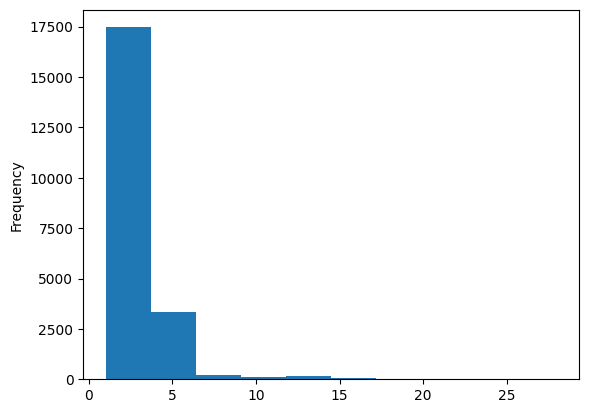

In [236]:
data.groupby("order_id")["quantity"].sum().plot(kind="hist")

<Axes: xlabel='quantity', ylabel='Count'>

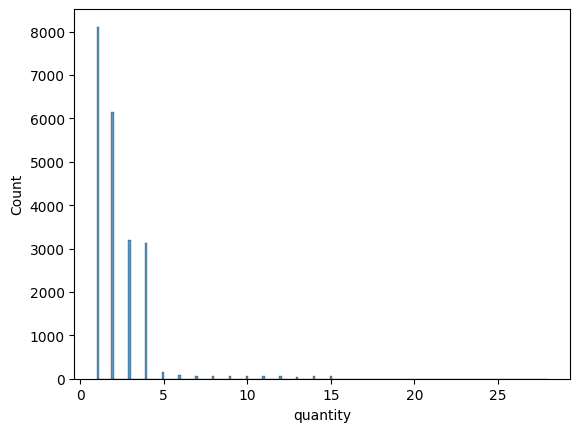

In [237]:
sns.histplot(data=data, x=data.groupby("order_id")["quantity"].sum())

<Axes: xlabel='quantity', ylabel='Density'>

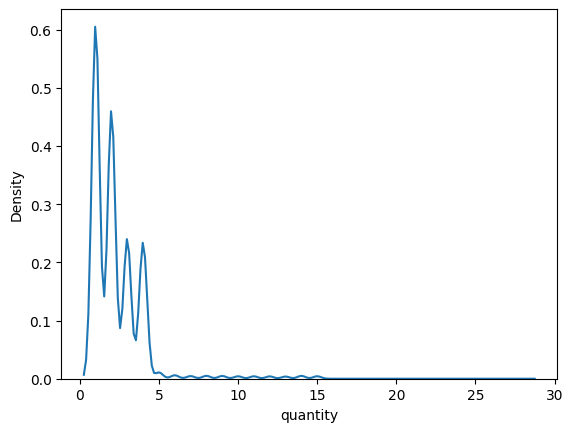

In [238]:
sns.kdeplot(data=data, x=data.groupby("order_id")["quantity"].sum())

#### b. Quelle est la répartition des prix totaux pour les commandes ?

<Axes: ylabel='Frequency'>

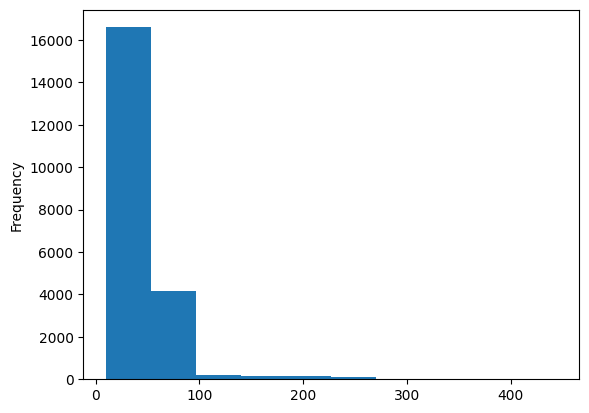

In [239]:
data.groupby("order_id")["total_price"].sum().plot(kind="hist")

<Axes: xlabel='total_price', ylabel='Count'>

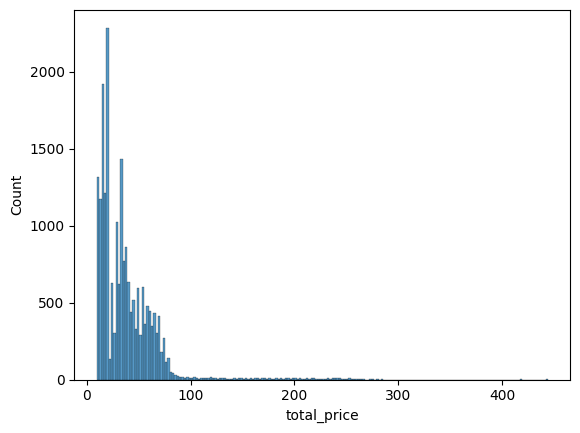

In [240]:
sns.histplot(data=data, x=data.groupby("order_id")["total_price"].sum())

<Axes: xlabel='total_price', ylabel='Density'>

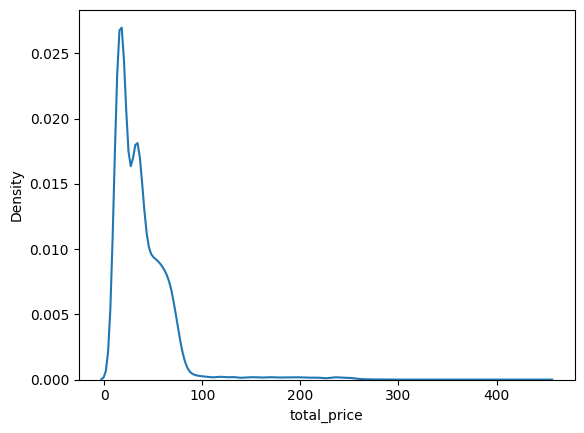

In [241]:
sns.kdeplot(data=data, x=data.groupby("order_id")["total_price"].sum())

# 9. Analyse du chiffre d’affaires en fonction du temps

#### a. Quel est le chiffre d'affaires quotidien ?

In [328]:
data.groupby(data["order_date"].dt.date)["total_price"].sum().to_frame(name="Chiffre d'affaire")

,Chiffre d'affaire
order_date,
2015-01-01,2713.85
2015-01-02,2731.90
2015-01-03,2662.40
2015-01-04,1755.45
2015-01-05,2065.95
...,...
2015-12-27,1419.00
2015-12-28,1637.20
2015-12-29,1353.25


#### b. Y a-t-il une corrélation entre l'heure de la journée et le total de la commande ?

<Axes: title={'center': "Chiffre d'affaire total par tranche horaire"}, xlabel='order_hour'>

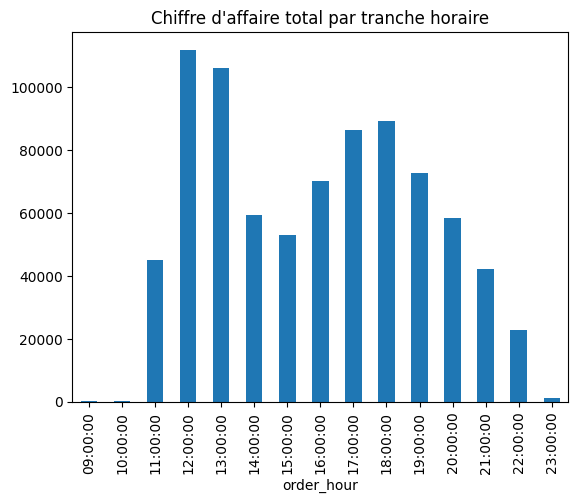

In [330]:
# Chiffre d'affaire selon l'horaire
data["order_hour"] = data["order_time"].apply(lambda x: pd.Timestamp.combine(pd.Timestamp.min, x).floor('H')).dt.time

plt.title("Chiffre d'affaire total par tranche horaire")
data.groupby("order_hour")["total_price"].sum().plot(kind="bar")

# 10. Pizzas populaires

#### a. Quelles sont les 5 pizzas les plus commandées en quantité ?

In [244]:
data.groupby("pizza_id")["quantity"].sum().sort_values(ascending=False).to_frame().head()

,quantity
pizza_id,
big_meat_s,1914
thai_ckn_l,1410
five_cheese_l,1409
four_cheese_l,1316
classic_dlx_m,1181


#### b. Quelles sont les 5 pizzas les plus commandées en termes de chiffre d'affaires ?

In [245]:
data.groupby("pizza_id")["total_price"].sum().sort_values(ascending=False).to_frame().head()

,total_price
pizza_id,
thai_ckn_l,29257.50
five_cheese_l,26066.50
four_cheese_l,23622.20
spicy_ital_l,23011.75
big_meat_s,22968.00


# 11. Chiffre d'affaires par taille et catégorie

#### a. Quelle est la répartition du chiffre d'affaires pour chaque taille de pizza ?

In [246]:
data.groupby("pizza_size")["total_price"].sum().sort_values(ascending=False).to_frame()

,total_price
pizza_size,
L,375318.70
M,249382.25
S,178076.50
XL,14076.00
XXL,1006.60


array([<Axes: ylabel='total_price'>], dtype=object)

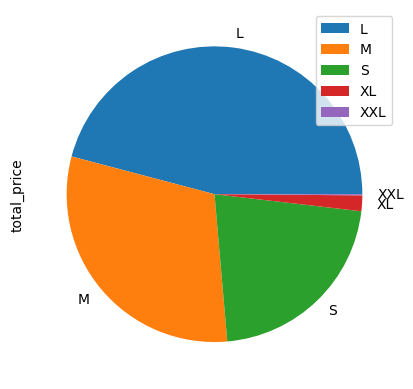

In [247]:
data.groupby("pizza_size")["total_price"].sum().sort_values(ascending=False).to_frame().plot.pie(subplots=True)

#### b. Quelle est la répartition du chiffre d'affaires pour chaque catégorie de pizza ?

In [248]:
data.groupby("pizza_category")["total_price"].sum().sort_values(ascending=False).to_frame()

,total_price
pizza_category,
Classic,220053.10
Supreme,208197.00
Chicken,195919.50
Veggie,193690.45


array([<Axes: ylabel='total_price'>], dtype=object)

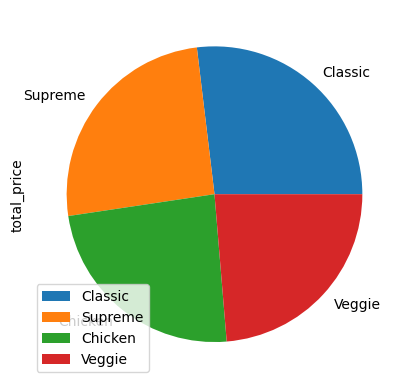

In [249]:
data.groupby("pizza_category")["total_price"].sum().sort_values(ascending=False).to_frame().plot.pie(subplots=True)

# 12. Corrélation entre prix et quantité

#### a. Y a-t-il une corrélation entre le prix unitaire et la quantité commandée ?

In [250]:
# Corrélation entre le prix unitaire et la quantité moyenne par commande
data.groupby("unit_price")["quantity"].mean()

unit_price
9.75     1.016238
10.50    1.018981
11.00    1.014035
12.00    1.025714
12.25    1.024096
12.50    1.015625
12.75    1.008775
13.25    1.021142
14.50    1.015345
14.75    1.015598
15.25    1.022472
16.00    1.010729
16.25    1.019749
16.50    1.017574
16.75    1.020028
17.50    1.007874
17.95    1.033778
18.50    1.036792
20.25    1.020119
20.50    1.014014
20.75    1.023719
21.00    1.000000
23.65    1.020833
25.50    1.014706
35.95    1.000000
Name: quantity, dtype: float64

In [251]:
# Corrélation entre le prix unitaire et la fréquence de commande
data.groupby("unit_price")["quantity"].count()

unit_price
9.75      739
10.50    1001
11.00     570
12.00    5600
12.25     830
12.50    3328
12.75    2507
13.25     473
14.50     391
14.75     577
15.25     712
16.00    4474
16.25    1114
16.50    4040
16.75    4294
17.50     381
17.95    1273
18.50    1359
20.25    3032
20.50    1998
20.75    8685
21.00     190
23.65     480
25.50     544
35.95      28
Name: quantity, dtype: int64

In [252]:
# Corrélation entre le prix unitaire et la quantité totale commandée
data.groupby("unit_price")["quantity"].sum()

unit_price
9.75      751
10.50    1020
11.00     578
12.00    5744
12.25     850
12.50    3380
12.75    2529
13.25     483
14.50     397
14.75     586
15.25     728
16.00    4522
16.25    1136
16.50    4111
16.75    4380
17.50     384
17.95    1316
18.50    1409
20.25    3093
20.50    2026
20.75    8891
21.00     190
23.65     490
25.50     552
35.95      28
Name: quantity, dtype: int64

In [253]:
data["unit_price"].corr(data["quantity"])

0.007142463924669947

#### b. Quel est le prix unitaire moyen pour différentes tailles de pizza ?

In [254]:
data.groupby("pizza_size")["unit_price"].mean().sort_values(ascending=True).to_frame()

,unit_price
pizza_size,
S,12.364328
M,15.951219
L,19.802553
XL,25.500000
XXL,35.950000


# 13. Tendances saisonnières

#### a. Y a-t-il des tendances saisonnières dans les commandes de pizza ?

In [335]:
# Import
from datetime import datetime

# Variables

fin_hiver = datetime(2015, 3, 19)
debut_printemps = datetime(2015, 3,20)
fin_printemps = datetime(2015, 6, 20)
debut_ete = datetime(2015, 6, 21)
fin_ete = datetime(2015, 9, 21)
debut_automne = datetime(2015, 9, 22)
fin_automne = datetime(2015, 12, 21)
debut_hiver = datetime(2015, 12, 22)

weekday_mapping = {
    0: 'Lundi',
    1: 'Mardi',
    2: 'Mercredi',
    3: 'Jeudi',
    4: 'Vendredi',
    5: 'Samedi',
    6: 'Dimanche'
}

In [256]:
def saison(date):
    if date <= fin_hiver or date >= debut_hiver:
        return "hiver"
    if debut_printemps <= date <= fin_printemps:
        return "printemps"
    if debut_ete <= date <= fin_ete:
        return "ete"
    if debut_automne <= date <= fin_automne:
        return "automne"

In [257]:
data["saison"] = data["order_date"].apply(saison)

In [331]:
data.groupby("saison")["quantity"].sum().sort_values(ascending=False).to_frame(name="Nombre de pizzas commandées")

,Nombre de pizzas commandées
saison,
printemps,12857
ete,12837
automne,12035
hiver,11845


In [332]:
data.groupby("saison")["total_price"].sum().sort_values(ascending=False).to_frame(name="Chiffre d'affaire")

,Chiffre d'affaire
saison,
printemps,212832.40
ete,211352.40
automne,198443.05
hiver,195232.20


In [333]:
data.groupby("saison")["order_id"].nunique().sort_values(ascending=False).to_frame(name="Nombre de commandes")

,Nombre de commandes
saison,
ete,5604
printemps,5562
automne,5110
hiver,5074


#### b. Y a-t-il une corrélation entre le jour de la semaine et la quantité de commandes ?

In [336]:
data.groupby(data["order_date"].dt.weekday.map(weekday_mapping))["order_id"].nunique().sort_values(ascending=False).to_frame(name="Nombre de commandes")

,Nombre de commandes
order_date,
Vendredi,3538
Jeudi,3239
Samedi,3158
Mercredi,3024
Mardi,2973
Lundi,2794
Dimanche,2624
